# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 3</p>
## <p style="text-align: center;">Total points: 85</p>
## <p style="text-align: center;">Due: Monday, **Oct 18th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Casey Copeland

EID: cmc6793



# Question 1: Stochastic gradient descent II (20 pts)

Write an SGD solution in Python to the non-linear model without using any other library except for those provided in the code template below. 

$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3x_1^2x_2 + w_4x_1x_2^2 + w_5x_2^3$$ 

The solution class template is given. The `init()` function of the class takes as input the `learning_rate`, `regularization_constant` and `number_of_epochs`. The `fit()` method must take as input `X`, `y` and `update_rule` which can be `'sgd_momentum'` or `'RMSprop'`. The `predict()` method takes an `X` value (optionally, an array of values). 

Use your new gradient descent regression to train your model and predict the data given in 'SGD_samples.csv', for 30 epochs, using learning rates: `[0.0001, 0.001, 0.01, 0.05]` and regularization (ridge regression) constants: `[0, 0.01, 0.1]`. **(8 points)** 

Plot MSE and the $w$ parameters as a function of epoch (for 30 epochs) for the best 2 combinations of `learning_rate` and `regularization_constant` for SGD-Momentum, RMSprop, i.e., for each combination, you should have one plot for MSE vs Epoch and another for the parameters(weights) vs Epoch using respectively SGD-Momentum and RMSprop, hence in total 8 plots. Report the `learning_rate`, `regularization_constant` and MSE at the end of 30 epochs for the two best combinations for SGD-Momentum and RMSprop respectively. **($4\times 2 = 8$ pts)**

Observe the results, compare the performance of the two learning methods **(4 pts)**. 

Here is a blog which you can go through to know about RMSprop and Adam - [blog](http://ruder.io/optimizing-gradient-descent/).

Following codes are for your reference, please don't change the initialization values of the given parameters.


In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        self.eps = 10**-8
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop
        self.gama = 0.9 # used only for rmsprop
        self.mu = 0.9 # used in momentum

    def rmsprop(self, gradient):
        '''
        updates self.coef based on gradient using rmsprop
        '''
    
    def sgd_momentum(self, gradient):
        '''
        updates self.coef based on gradient using Sgd_momentum
        '''
    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        
        '''

    def get_features(self, X):
       x = np.zeros((X.shape[0], num_terms))
       x[:,0] = 1
       x[:,1] = X[:,0]
       x[:,2] = X[:,0]*X[:,1]
       x[:,3] = (X[:,0]**2)*X[:,1]
       x[:,4] = X[:,0] * (X[:,1]**2)
       x[:,5] = X[:,1]**3
       
       return x
        
    def linearPredict(self, X_features):
       '''
       returns the dot product of X and self.coef
       '''

In [ ]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

Saving Q3_test_dataset.csv to Q3_test_dataset.csv
Saving Q3_train_dataset.csv to Q3_train_dataset.csv
Saving sales_data.csv to sales_data.csv
Saving SGD_samples.csv to SGD_samples.csv
Saving hw3_playground.png to hw3_playground.png


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Answer:

In [ ]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

num_of_coefs = 6

class LinearRegression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate 
        self.n_epoch = n_epoch 
        self.regularization = regularization 
        self.eps = 10**-8 #epsilon value
        self.coef = np.zeros(num_of_coefs) # coefficient vector
        self.cache = np.zeros(self.coef.shape) # used only for rmsprop 
        self.gama = 0.9 # used only for rmsprop 
        self.mu = 0.9 # used in momentum
        self.momemtum = 0

    def rmsprop(self, gradient):

        #updates self.coef based on gradient using rmsprop
        
        self.cache = (self.gama * self.cache) + (1-self.gama) * np.square(gradient)
        self.coef =  self.coef - ((self.learning_rate * gradient) / (np.sqrt(self.cache) + self.eps))
    
    def sgd_momentum(self, gradient):
        
        #updates self.coef based on gradient using sgd_momentum

        self.momemtum = self.mu *self.momemtum + self.learning_rate * gradient
        self.coef = self.coef - self.momemtum

    
    def fit(self, X, y, update_rule='sgd_momentum', plot=False):
        
        '''
        Fit the model given X, y. It uses the specified update_rule
        and displays a plot of the coefficients vs epochs, and mse vs epochs if plot is set as True. 
        
        -> use get_features to get the features from X
        -> for epoch in epochs:
            iterate through all x, y.
                compute prediction using linearPredict.
                compute gradient.
                pass this gradient to the corresponding update function and update the coefficients
                keep track of mse and coefficients
        -> plot if required
        '''
        mse = []
        coefs = []
        
        
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                X_i = X[i,:]
                e_i = self.linearPredict(X_i) - y[i]
                # Compute gradients
                #gradient = (e_i * X_i) + (self.regularization * self.coef)
                gradient = np.array([2*e_i*X_i[0] + 2*self.regularization*self.coef[0],
                                     2*e_i*X_i[1] + 2*self.regularization*self.coef[1],
                                     2*e_i*X_i[2] + 2*self.regularization*self.coef[2],
                                     2*e_i*X_i[3] + 2*self.regularization*self.coef[3],
                                     2*e_i*X_i[4] + 2*self.regularization*self.coef[4],
                                     2*e_i*X_i[5] + 2*self.regularization*self.coef[5]])
    
                # Update weights
                if update_rule == 'sgd_momentum':
                    self.sgd_momentum(gradient)
                elif update_rule == 'rmsprop':
                    self.rmsprop(gradient)
   
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))
        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.plot(range(self.n_epoch),coefs[:,4],label='w4')
            plt.plot(range(self.n_epoch),coefs[:,5],label='w5')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        x = np.zeros((X.shape[0], num_of_coefs))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = (X[:,0]**2)*X[:,1]
        x[:,4] = X[:,0] * (X[:,1]**2)
        x[:,5] = X[:,1]**3
       
        return x
        
    def linearPredict(self, X_features):
        '''
        returns the dot product of X and self.coef
        '''
        predict = np.dot(X_features, self.coef)
        return predict

In [ ]:

data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 30
learning_rate = [0.0001, 0.001, 0.01, 0.05]
regularization = [0, 0.01, 0.1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/pyt

Parameter: SGD Momentum
Best Hyper parameter 1: (0.0001, 0)
Best Hyper parameter 2: (0.001, 0)
Lowest MSE scores: [0.020338107645762996, 0.02035089879229265]


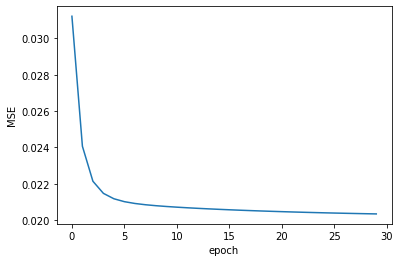

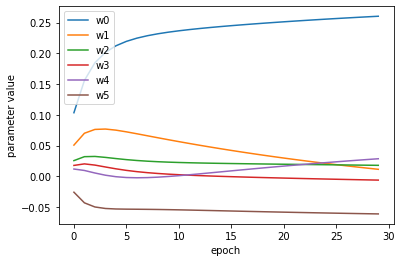

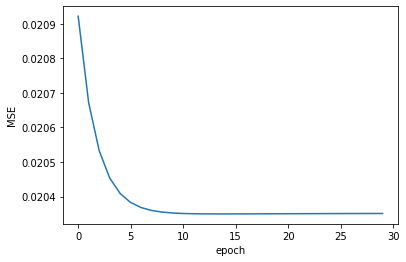

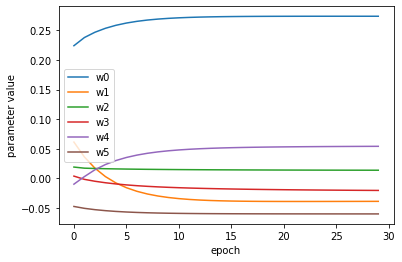

In [ ]:
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    LR = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    LR.fit(X,y,update_rule = 'sgd_momentum', plot=False)
    lowest_scores.append(LR.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
print('Parameter: SGD Momentum')
print("Best Hyper parameter 1:",hyper[chosen_hyper[0]])
print("Best Hyper parameter 2:",hyper[chosen_hyper[1]])
lowest_scores = []
for hyper_iter in chosen_hyper:
    LR = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    LR.fit(X,y,update_rule = 'sgd_momentum',plot=True)
    lowest_scores.append(LR.lowest_mse)
print('Lowest MSE scores:', lowest_scores)


Parameter: RMS Prop
Best Hyper parameter 1: (0.001, 0)
Best Hyper parameter 2: (0.001, 0.01)
Lowest MSE scores: [0.020202367892380207, 0.020331512560002714]


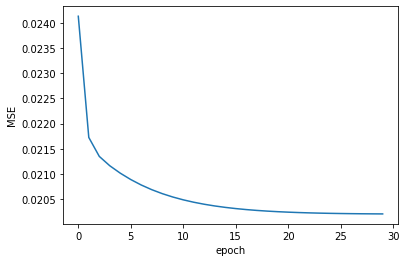

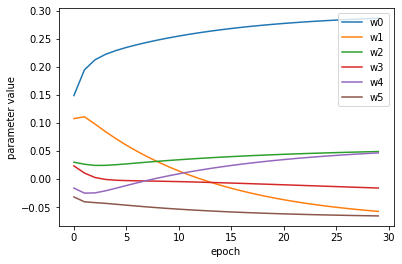

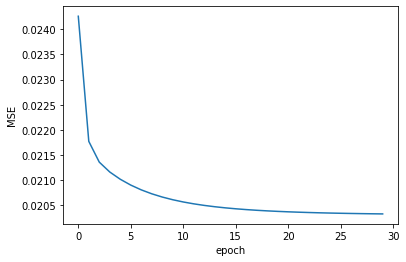

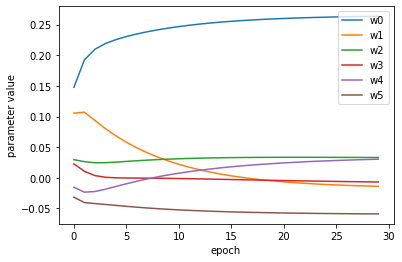

In [ ]:
hyper = []
for lr in range(0, len(learning_rate)):
    for reg in range(0, len(regularization)):
        hyper.append((learning_rate[lr], regularization[reg]))
lowest_scores = []
for hyper_iter in range(0, len(hyper)):
    LR = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    LR.fit(X,y,update_rule = 'rmsprop', plot=False)
    lowest_scores.append(LR.lowest_mse)
    
chosen_hyper = np.argsort(np.array(lowest_scores))[:2]
print('Parameter: RMS Prop')
print("Best Hyper parameter 1:",hyper[chosen_hyper[0]])
print("Best Hyper parameter 2:",hyper[chosen_hyper[1]])
lowest_scores = []
for hyper_iter in chosen_hyper:
    LR = LinearRegression(hyper[hyper_iter][0], hyper[hyper_iter][1], n_epochs)
    LR.fit(X,y,update_rule = 'rmsprop',plot=True)
    lowest_scores.append(LR.lowest_mse)
print('Lowest MSE scores:', lowest_scores)

# Question 2: Tensorflow Playground (15 pts)

In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).

Select "**Classification**" as the **Problem Type**. Among the four datasets shown in DATA, please select the **top right** dataset. 

Use the following settings as the DEFAULT settings for all **subquestions**: Learning rate = 0.03, Activation = Tanh, Regularization = None, Ratio of training to test data = 50%, Noise = 0, Batch Size = 30, input as $X_1$ with $X_2$, One hidden layer with two neurons.

a) **(4 pts)** Use the DEFAULT setting and run two experiments - one using **Tanh** as the activation function and one using the **Linear** activation function. Report the train, test losses for both at the end of **1000 epochs**. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this? 

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with **Tanh** as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT, report the training loss and test loss at the end of 1000 epochs **using 4 neurons and 8 neurons in the hidden layer**. What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this? 

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT, change the Activation to **ReLU** and use **4 neurons** in the hidden layer. For learning rate 10, 1, 0.1, 0.01 and 0.001, report the train, test losses at the end of **100 epochs**, **1000 epochs** respectively. What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? 

d) **(3 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as $\sin(X_1), X_1^2$ etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

# Answer:

### a) Tahn vs Linear activation
   Tanh: 
    Training Loss: 0.175
    Test Loss: 0.203
    The tahn activation layer much more acurately predicts the classification. The hidden layers predict oppositely orange and blue, with diagonal cuts in the lower quadrants of the plot. The output is much more accurate than the linear output. The algorithm correctly predicts the blue and orange values in the lower half of the plot. The colors are intense, meaning the algorithm is confident of these predictions. However it does not predict all 4 of the classification areas, only the bottom 2.

   Linear: 
    Training Loss: 0.496
    Test Loss: 0.505
    The linear test boundaries does half blue and half orange, correctly predicting the classification 50% of the time. If you look at the two different nuerons, they both split the data 50/50, one with a diagonal line, one with a vertical line. The output color (blue vs orange) is not. very intense (it is quite opaque), showing that the algorithm is not super confident in it's prediction. 
    
### b) 4 nuerons vs 8 nuerons

4 nuerons with a Tahn activation layer, results in a super low Test & Training loss of 0.018. It correctly predicts all 4 classification areas with very distinct quadrant boundaries, it is a highly accurate and confident model. With 8 nuerons the model more quickly predicts the 4 classification regions, however as we increas epochs, the model begins to overfit the data. We see the regions become more wonky (aka reactive to single datapoints) and we see the training loss approach 0 while test loss stays around .019

Even with 4 nuerons, the linear activation model does not do a good job of predicting the classification of the points. This lends to the fact that having a non-linear activation layer results in a global approximator with nueral networks. Same as with 2 nuerons, the linear model output have a high test error compared to Tahn and does not confidently or accurately predict the classification regions. Changining to 8 nuerons does not impact the accuracy of the model output. 

### c)Activation= ReLU, 4 neurons. learning rates: 10, 1, 0.1, 0.01, 0.001  What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers?

Learning Rate 10
100 epochs
Train loss: .960
Test loss: .992

1000 epochs
Train loss: .960
Test loss: .992

Way too fast of a learning rate, the model jumps to a prediction and is not able to adapt. With these settings, the model predicts blue for every data point from the very beginning of the epochs and does not adjust or update due to the high learning rate. 


Learning Rate 1
100 epochs
Train loss: .008
Test loss: .018

1000 epochs
Train loss: .008
Test loss: .019

Again, with a high learning rate, we see alot of convergence at the first few epochs and then no change as we increase interations. This learning rate however, the model was able to predict the classification pretty accurately. I can see it mis classifies one point & has very rigid boundary points, versus the Tahn models we tested in part a) & b)


Learning Rate .1
100 epochs
Train loss: .011
Test loss: .018

1000 epochs
Train loss: .001
Test loss: .007

At this learning rate, the algorithm creates similar boundaries as the previous learning rate, however without any miss classification. We also see the Training loss & test loss improve with more epochs, showing the model is continuing to learn with more interations


Learning Rate .01
100 epochs
Train loss: .086
Test loss: .075

1000 epochs
Train loss: .016
Test loss: .011

This learning rate may be too small, converging too slowly as we see the model has pretty high loss at 100 epochs and a higher loss at 1000 epochs as compared to our previous model with a .1 learning rate. It also is still misclassifying points at 1000 epochs. 

Learning Rate .001
100 epochs
Train loss: .343
Test loss: .345

1000 epochs
Train loss: .082
Test loss: .074

At 100 epochs, the model output is still very opaque with out distinct classification areas, showing the model is converging too slowly & unable to predict accurately while being computationally efficient. Even at 1000 epochs, the model still misclassifies multiple points. 

We see the best performance at a learning rate of .1. This expirement displays how important choosing the correct learning rate is. 


### d)Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc. 

Using 4 nuerons and all features as the default settings for learning rate & activation, as well as the feature X1X2 resulted in the model converging fast and predicting very accurately with a train & test loss close to 0. The X1X2 feature looks very similar to our dataset therefore it caused fast convergence and extremely accurate outputs.



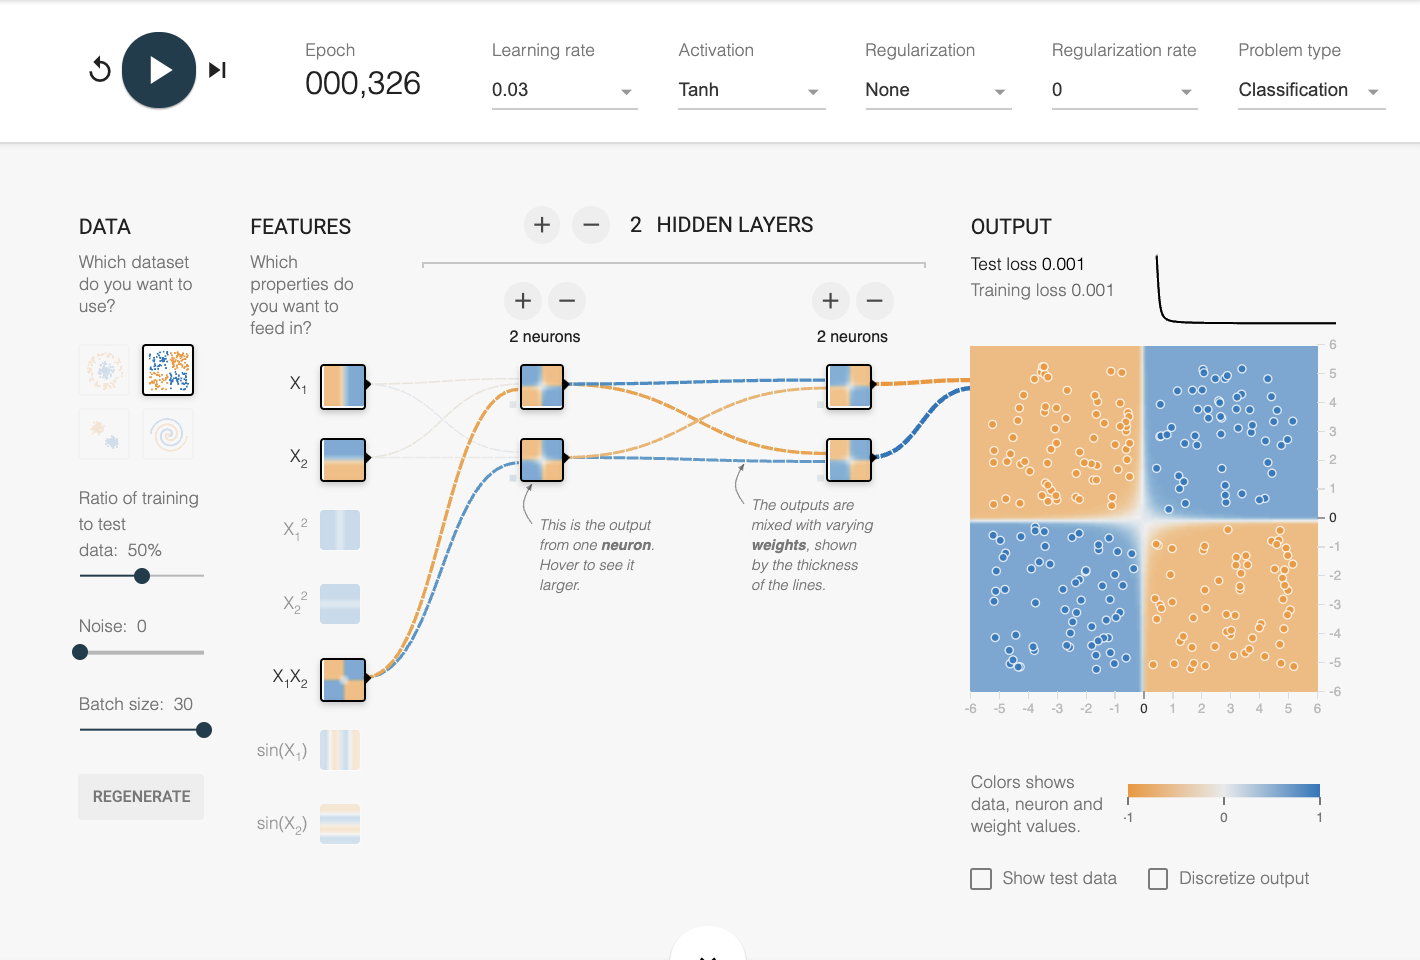

In [ ]:
from IPython.display import Image
Image(filename = 'hw3_playground.png')

# Question 3: Outlier detection using PyOD (30 pts)

Oulier detection, or anomaly detection is usually an unsupervised learning task where the objective is to identify suspicious observations in data. It has been widely used in military surveillance for enemy activities to prevent attacks, intrusion detection in cyber security, fraud detection for credit cards, etc.

PyOD is a comprehensive and scalable Python library for detecting outlying objects in multivariate data. PyOD includes more than 30 detection algorithms and provides unified APIs which makes it quite handy to use. In this question, you will play with PyOD, explore three different outlier detection algorithms and compare their performances. First let's install PyOD.

```
# install pyod using pip first
!pip install pyod
```

You can load the data stored in 'Q3_train_dataset.csv' and 'Q3_test_dataset.csv' using the following codes.

```
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()
```

 `X_train` and `X_test` contain the features, with the dimension of 5. `y_train` and `y_test` store the outlier labels, 0 means normal data, 1 means outlier data. 
 
a) **(5 pts)** **Fit `X_train` to a linear outlier detection model Minimum Covariance Determinant (MCD) using PyOD**, this [page](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.mcd) will provide some functions you may need. 

```
from pyod.models.mcd import MCD
clf = MCD() # initialize MCD class using the default parameters

# YOUR CODE SHOULD COME HERE, FIT THE MODEL USING X_TRAIN
```
**Use the fitted model to predict the outlier labels of `X_test`. Compute the raw outlier scores on `X_test` using `decision_function()`.**

**Run PyOD's `evaluate_print()` function using the test set ground truth outlier labels and the raw outlier scores predicted by the model, to compute the ROC and Precision@n results .** 

```
from pyod.utils.data import evaluate_print
```

b) **(5 pts)** `X_train` and `X_test` are 5-dimension features, which makes it impossible to visualize them in Euclidean plane. But we can use Principal Component Analysis (PCA) to reduce the dimensions of `X_train` and `X_test` to 2, and then plot them. You may want to use `fit_and_transform()` function.


```
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = # IMPLEMENT
test_principalComponents = # IMPLEMENT
```

After reducing the dimension to 2, now you can visualize the outliers using PyOD's `visualize()` function. Please plot the visualization. You may find [this](https://pyod.readthedocs.io/en/latest/pyod.utils.html#module-pyod.utils.example) useful on how to use `visualize()` .

```
from pyod.utils.example import visualize
```

Now you should be able to observe the ground truth outliers and the outliers predicted by the model.


c) **(20 pts)** Apply the same process as in (a) and (b) to the following two models, and visualize the outlier results. Please compare the performance of the three models in terms of their ROC, Precision@n, and what you observe from the three visualizations.

*   [Proximity-Based model - Clustering Based Local Outlier Factor (CBLOF)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.cblof)
*   [Probabilistic model - Copula-based Outlier Detection (COPOD)](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.copod)

```
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD
```

# Answer:

In [ ]:
# install pyod using pip first
!pip install pyod

     |████████████████████████████████| 111 kB 5.2 MB/s 
  Created wheel for pyod: filename=pyod-0.9.4-py3-none-any.whl size=130726 sha256=6c98ebb9567ed7f94800a4e5732a00cbfe1833074163ce276a8a80de94faf1d7
  Stored in directory: /root/.cache/pip/wheels/50/32/84/d64079e8bf087c1b231c9beecfa9abc08592ab5f5f333124cd
Successfully built pyod


In [ ]:
import pandas as pd
# Load data code goes here
train_df = pd.read_csv('Q3_train_dataset.csv')
test_df = pd.read_csv('Q3_test_dataset.csv')

X_train = train_df[['X_train_0', 'X_train_1', 'X_train_2', 'X_train_3', 'X_train_4']].to_numpy()
y_train = train_df[['y_train']].to_numpy()
X_test = test_df[['X_test_0', 'X_test_1', 'X_test_2', 'X_test_3', 'X_test_4']].to_numpy()
y_test = test_df[['y_test']].to_numpy()

In [ ]:
# (a)
from pyod.models.mcd import MCD
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

clf = MCD() # initialize MCD class using the default parameters
clf_name = 'MCD'
# fit the model using X_train

clf.fit(X_train)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_ 

# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores

# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
MCD ROC:0.919, precision @ rank n:0.675

On Test Data:
MCD ROC:0.8689, precision @ rank n:0.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


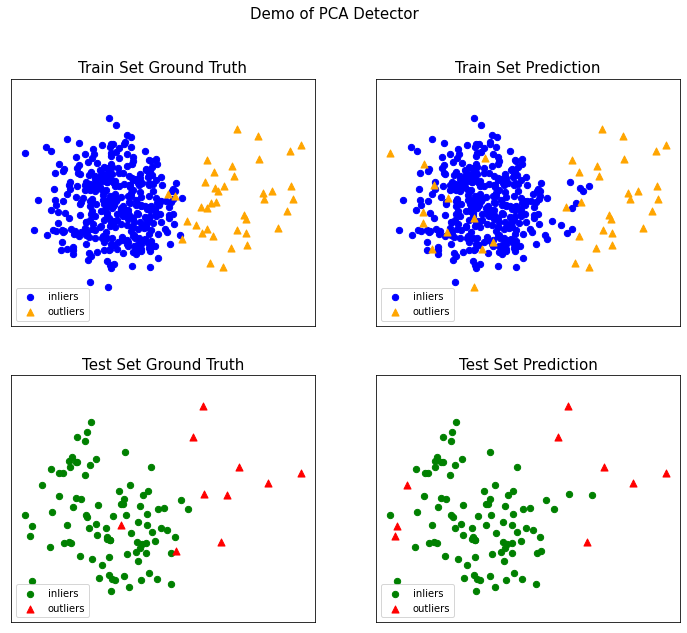

In [ ]:
# (b)
from sklearn.decomposition import PCA
from pyod.utils.example import visualize
pca = PCA(n_components=2)

# Fit pca to X_train and X_test and transform 
train_principalComponents = pca.fit_transform(X_train)
test_principalComponents = pca.fit_transform(X_test)

# Visualize the ground truth outliers and predicted outliers using visualize()

visualize('PCA', train_principalComponents, y_train, test_principalComponents,
                          y_test, y_train_pred, y_test_pred, show_figure = True, save_figure = False)

In [ ]:
clf.fit_predict_score(X_test, y_test, scoring = "roc_auc_score")

roc_auc_score: 0.8300000000000001


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict_score is deprecated
  warnings.warn(msg, category=FutureWarning)


0.8300000000000001

In [ ]:
clf.fit_predict_score(X_test, y_test, scoring = "prc_n_score")

prc_n_score: 0.6


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function fit_predict_score is deprecated
  warnings.warn(msg, category=FutureWarning)


0.6

/usr/local/lib/python3.7/dist-packages/pyod/models/base.py:344: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CBLOF(alpha=0.9, beta=5, check_estimator=False, clustering_estimator=None,
   contamination=0.1, n_clusters=8, n_jobs=None, random_state=None,
   use_weights=False) ROC:0.9044, precision @ rank n:0.8


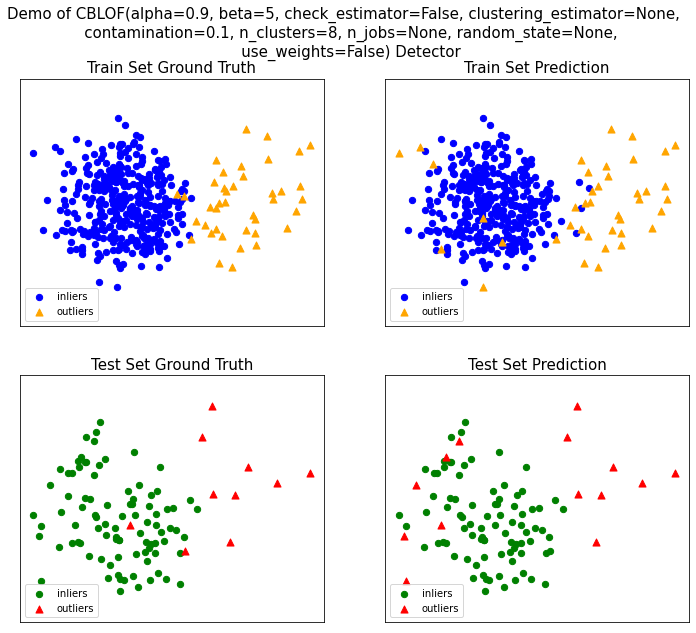

/usr/local/lib/python3.7/dist-packages/pyod/models/base.py:344: UserWarning: y should not be presented in unsupervised learning.
  "y should not be presented in unsupervised learning.")
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


COPOD(contamination=0.1, n_jobs=1) ROC:0.9556, precision @ rank n:0.8


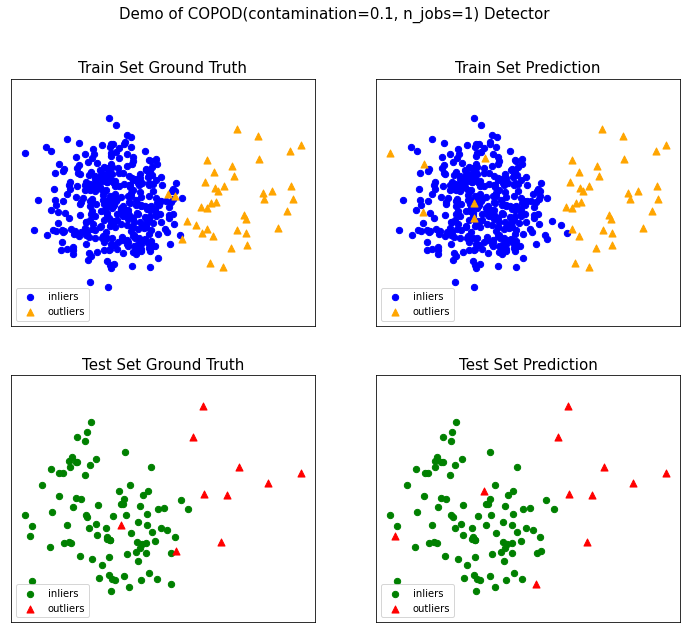

In [ ]:
# (c)
from pyod.models.cblof import CBLOF
from pyod.models.copod import COPOD

clf_cblof = CBLOF()
clf_cblof.fit(X_train, y_train)

evaluate_print(clf_cblof, y_test, clf_cblof.decision_function(X_test))

visualize(clf_cblof, train_principalComponents, y_train, test_principalComponents, 
          y_test, clf_cblof.predict(X_train),clf_cblof.predict(X_test))

clf_copod = COPOD()
clf_copod.fit(X_train, y_train)

evaluate_print(clf_copod, y_test, clf_copod.decision_function(X_test))

visualize( clf_copod, train_principalComponents, y_train, test_principalComponents, y_test, clf_copod.predict(X_train), clf_copod.predict(X_test))

#Question 4: PCA Conceptual questions (5 pts)
Explain the principle of Principal Component Analysis algorithm, especially why we can select the best projection bases based on the covariance matrix of data from the perspective of optimization?

# Answer:
PCA is used to reduce dimensionality of large datasets by combining variables together while preserving as much variance as possible. PCA reduces the # of variables, making visualization & analysis easier and while accuracy is somewhat reduced, PCA aims to keep as much variance/accuracy as is possible. 

covariance matrix - allows you to reduce redudancy by identifying the correlation of variables. 

PCA creates eigenvectors by choosing directions one by one that capture the most variance, resulting in Priciple Components. For our visualization efforts we chose to only plot 2 Principle Components in order to show in a 2D space inliers vs outliers. 




# Question 5: Pre-processing and sampling (15 pts)

The following dataset contains House prices describing the sales of individual residential property in Ames, Iowa data with explanatory variables describing almost every aspect of residential homes and dependent variable being SalePrice. Here, some cells of most columns in the dataset contain NaN values.













In [ ]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import math
import matplotlib.pyplot as plt
np.random.seed(100)

data = pd.read_csv("sales_data.csv")
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000



a) **(2 pts)** Print the number of NaN values in each column.


In [ ]:
total = data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
MasVnrArea,8,0.547945
Electrical,1,0.068493


b) **(3 pts)** Create a copy of `data`, and name it `data_dm`, then create a new column in `data_dm` named `binned_yr_built` and apply binning to the column `yr_built`. Use `pandas.cut()` and modify its paramter list as below:

```
bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020]
labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000', '2000-2020']
include_lowest=True
```
Next, perform one-hot encoding on this new column.

In [ ]:
print(min(data.YearBuilt[data["YearBuilt"] != 'NA'].values), ',',
      max(data.YearBuilt[data["YearBuilt"] != 'NA'].values))

1872 , 2010


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#switched up the syntax and it ran and im guessing it just cut out the 1800s 
#created new column to not overwrite anything 

data_dm =data.copy()

data_dm['binned_yr_built']=pd.cut(data['YearBuilt'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020], labels=['1900-1920', '1920-1940', '1940-1960', '1960-1980', '1980-2000','2000-2020'], include_lowest=True).astype(str)
data_dm.head()
#one hot encoding

ohe = OneHotEncoder()
ohe.fit(data_dm[['binned_yr_built']])
yr_built_ohe = pd.DataFrame(ohe.transform(data_dm[['binned_yr_built']]).toarray(), columns=ohe.get_feature_names())
print(yr_built_ohe.head())

# removing the columns with "na" name
yr_built_ohe.drop('x0_nan', axis=1, inplace=True)

# combining two dataframes "data_dm" and "yr_built_ohe" to get the final resulting dataframe
data_dm = pd.concat([data_dm, yr_built_ohe], axis=1)
data_dm.head()

   x0_1900-1920  x0_1920-1940  x0_1940-1960  ...  x0_1980-2000  x0_2000-2020  x0_nan
0           0.0           0.0           0.0  ...           0.0           1.0     0.0
1           0.0           0.0           0.0  ...           0.0           0.0     0.0
2           0.0           0.0           0.0  ...           0.0           1.0     0.0
3           1.0           0.0           0.0  ...           0.0           0.0     0.0
4           0.0           0.0           0.0  ...           1.0           0.0     0.0

[5 rows x 7 columns]


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice,binned_yr_built,x0_1900-1920,x0_1920-1940,x0_1940-1960,x0_1960-1980,x0_1980-2000,x0_2000-2020
0,60,RL,65.0,8450,NaN,7,5,2003,2003,196.0,Gd,706,0,150,856,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,2,548,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,208500,2000-2020,0.0,0.0,0.0,0.0,0.0,1.0
1,20,RL,80.0,9600,NaN,6,8,1976,1976,0.0,TA,978,0,284,1262,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,2,460,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,181500,1960-1980,0.0,0.0,0.0,1.0,0.0,0.0
2,60,RL,68.0,11250,NaN,7,5,2001,2002,162.0,Gd,486,0,434,920,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,2,608,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,223500,2000-2020,0.0,0.0,0.0,0.0,0.0,1.0
3,70,RL,60.0,9550,NaN,7,5,1915,1970,0.0,TA,216,0,540,756,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,3,642,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,140000,1900-1920,1.0,0.0,0.0,0.0,0.0,0.0
4,60,RL,84.0,14260,NaN,8,5,2000,2000,350.0,Gd,655,0,490,1145,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,3,836,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,250000,1980-2000,0.0,0.0,0.0,0.0,1.0,0.0



c) **(2 pts)** Drop the columns which have more than 65 percentage of missing values.

In [ ]:
missing_data.head()

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274


In [ ]:
data_dm = data_dm.drop(['PoolQC','MiscFeature','Alley','Fence'],1)


d) **(3 pts)** Take a sample of 800 rows at random and compute its mean, compare this value with the population mean.
  

In [ ]:
np.random.seed(6)
sample_ages = np.random.choice(a= data['SalePrice'], size=800)
#Sample mean
print('Sample mean:', sample_ages.mean())
#Population mean
pop_mean = data['SalePrice'].mean()
print('Population mean:', pop_mean)

Sample mean: 178292.63125
Population mean: 180921.19589041095


e) **(2pts)** Calculate the 95% confidence intervals for SalePrice with a sample size of 100. 

**(3pts)** Calculate the 95% confidence intervals for 100 different trials with a sample size of 500. Plot the confidence intervals and interpret how it captures the population mean.

In [ ]:
np.random.seed(10)
sample_size = 100
sample = np.random.choice(a= data_dm['SalePrice'],
                          size = sample_size)
sample_mean = sample.mean()

#Get the critical Z value
import scipy.stats as st
z_critical = st.norm.ppf(.95)

#Get population standard deviation
pop_stdev = data_dm['SalePrice'].std()

#margin of error
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size)) 

#confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

#Print confidence interval and true mean value
import statsmodels.stats.api as sms
confidence = sms.DescrStatsW(sample).tconfint_mean()

print(confidence)
print(confidence_interval)
print("true mean: ", sample_mean)

(166944.9503114173, 197240.10968858268)
(169025.40109989812, 195159.65890010187)
true mean:  182092.53


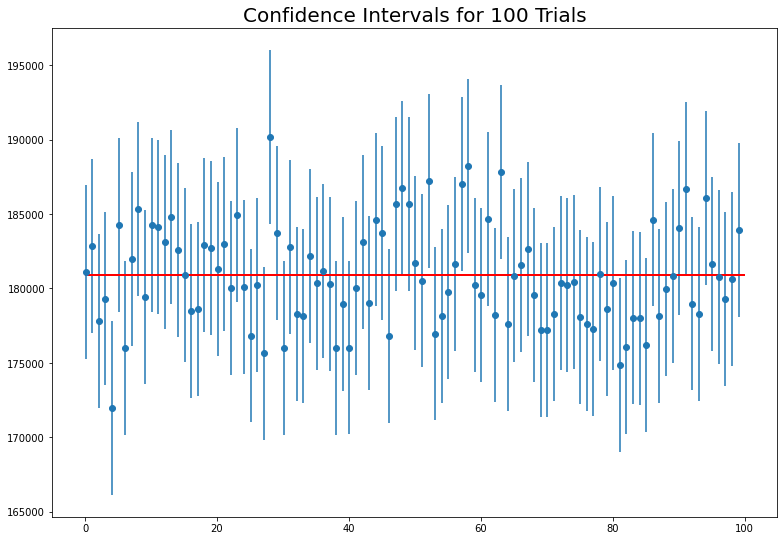

In [ ]:
np.random.seed(12)

sample_size = 500

intervals = []
sample_means = []

for sample in range(100):
    sample = np.random.choice(a= data_dm['SalePrice'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    # compute z critical value

    # compute population standard deviation     
  
    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    
plt.figure(figsize=(13, 9))

plt.errorbar(x=np.arange(0.1, 100, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=100,
           y=data['SalePrice'].mean(), 
           linewidth=2.0,
           color="red")
plt.title('Confidence Intervals for 100 Trials', fontsize = 20)
plt.show()

## Interpretation of Graph:
Although it looks like the trials are highly fluctuating and oscelating, the population stays consistent across the 100 trials, as the same means are equally distributed. This shows the model does accurately capture the population mean.